In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
def format_l(df,l=1):
    n_datos_inc = df.shape[0] #cantidad total de meses
    n_filas = n_datos_inc - l #cantidad de filas de resultado
    res = np.zeros((n_filas,l+1))
    i = 0
    while i < n_filas:
        res[i] = df[i:i+l+1].flatten()
        i = i+1
    return res

In [8]:
def graph_predictions(l,df_original,y_train_pr,y_test_pr):
    plt.plot(df_original) #los datos originales
    months_tr = np.arange(l,y_train_pr.shape[0]+l)
    last_tr = y_train_pr.shape[0]
    #months_ts = np.arange(last_tr+1+l,last_tr+y_test_pr.shape[0]+l+1)
    plt.plot(months_tr,y_train_pr,label='train')
    #plt.plot(months_ts,y_test_pr,label='test')
    plt.legend()
    plt.show()

In [4]:
def first_model(l=1):
    #punto 1: cargo los datos y les hago un primer formatting
    file_dir = 'airline-passengers.csv'
    data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
    df = pd.DataFrame(data)
    df = df.drop(columns=['Month']) #no hace falta esta columna para nada
    df = df.to_numpy() #me paso a numpy array
    df_original = np.copy(df)
    #punto 2: normalizo entre 0 y 1
    scaling = MinMaxScaler(feature_range=(0,1))
    df = scaling.fit_transform(df)
    df = format_l(df,l)
    #punto 3: agrego ruido gaussiano pedido
    df += np.random.normal(0,0.02,df.shape)
    #punto 4: dividir en conjuntos de train y test
    num_samples = df.shape[0]
    x = df[:,:l]
    y = df[:,l:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,shuffle=False)
    #punto 5: ajustar los datos para la capa LSTM (samples, time, features)
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    #punto 6: crear el modelo
    model = keras.Sequential()
    model.add(keras.layers.LSTM(4, input_shape=(1,l))) #input_shape = (1,l) sin el samples, analogo a redes anteriores
    model.add(keras.layers.Dense(1))
    #punto 7: entrenar la red
    model.compile(optimizer='adam',loss=keras.losses.MSE) #no metrics porque seria mse, compilo
    history = model.fit(x_train, y_train,epochs=100,batch_size=1) #entreno el modelo
    #punto 8: realizar predicciones
    y_train_pr = model.predict(x_train)
    y_test_pr = model.predict(x_test)
    #invertir predicciones
    y_train_pr = scaling.inverse_transform(y_train_pr)
    y_train = scaling.inverse_transform(y_train)
    y_test_pr = scaling.inverse_transform(y_test_pr)
    y_test = scaling.inverse_transform(y_test)
    #calcular el mse para test
    print('MSE para train dataset:',round(np.square(y_train_pr-y_train).mean(),1))
    print('MSE para test dataset:',round(np.square(y_test_pr-y_test).mean(),1))
    #grafico
    graph_predictions(l,df_original,y_train_pr,y_test_pr)

Epoch 1/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0267
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 8/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 9/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 10/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 11/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 12/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 13/100
71/71 [=================

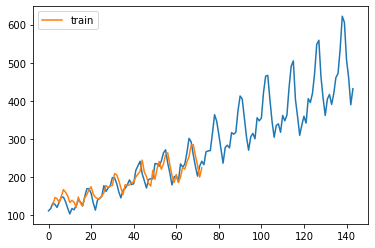

In [11]:
first_model(l=2)